In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Cleaning

Primary Data Set Cleaning

In [ ]:
#Load Primary Data set and Filter it to only include columns of interest for our analysis
columns = ['Rk', 'Pk', 'Tm', 'Player', 'DraftYear']
draft_data = pd.read_csv('./draft-data-20-years.csv')[columns]

#Uncomment Line Below to View Cleaned Primary Data Set
#draft_data.head()

Most Valuable Player (MVP), Defensive Player of the Year (DPOY),  and Sixth Man of the Year (6MOTY) Data Set Cleaning

In [ ]:
#Load MVP Data set
mvp_data = pd.read_csv('./nba_mvp.csv', header=1)

#Group Data set by player, and count how many seasons they won MVP. Rename columns for readability.
mvp_data = mvp_data.groupby('Player').count()[['Season']].reset_index().rename(columns = {'Season': 'Num_MVPs'})

#Uncomment Line Below to View Cleaned MVP Data set
#mvp_data.head()

,Player,Num_MVPs
0,Allen Iverson,1
1,Bill Russell,5
2,Bill Walton,1
3,Bob Cousy,1
4,Bob McAdoo,1
5,Bob Pettit,2
6,Charles Barkley,1
7,Dave Cowens,1
8,David Robinson,1
9,Derrick Rose,1


In [ ]:
#Load DPOY data set
dpoy_data = pd.read_csv('./nba_dpoy.csv', header = 1)

#Group Data set by player, and count how many seasons they won DPOY. Rename columns for readability.
dpoy_data = dpoy_data.groupby('Player').count()[['Season']].reset_index().rename(columns = {'Season': 'Num_DPOYs'})

#Uncomment Line Below to View Cleaned DPOY Data set
#dpoy_data.head()

,Player,Num_DPOYs
0,Alonzo Mourning,2
1,Alvin Robertson,1
2,Ben Wallace,4
3,David Robinson,1
4,Dennis Rodman,2
5,Dikembe Mutombo,4
6,Draymond Green,1
7,Dwight Howard,3
8,Gary Payton,1
9,Giannis Antetokounmpo,1


In [ ]:
#Load 6MOTY data set
sixth_moty_data= pd.read_csv('./nba_smoy.csv', header = 1)

#Group Data set by player, and count how many seasons they won 6MOTY. Rename columns for readability.
sixth_moty_data = sixth_moty_data.groupby('Player').count()[['Season']].reset_index().rename(columns = {'Season': 'Num_6MOTYs'})

#Uncomment Line Below to View Cleaned 6MOTY Data set
# sixth_moty_data.head()

,Player,Num_6MOTYs
0,Aaron McKie,1
1,Antawn Jamison,1
2,Anthony Mason,1
3,Ben Gordon,1
4,Bill Walton,1
5,Bobby Jackson,1
6,Bobby Jones,1
7,Clifford Robinson,1
8,Corliss Williamson,1
9,Danny Manning,1


Historic All NBA Team Data Set Cleaning

In [ ]:
#Load All NBA Team Dataset using relevant columns, and rename unnamed columns to correspond to Player Name at a certain position on the team
all_nba = pd.read_csv('nba_all_league.csv', usecols = [0,2,4,5,6,7,8]
                       ).rename(columns = {'Unnamed: 4': 'P1',
                                           'Unnamed: 5': 'P2',
                                           'Unnamed: 6': 'P3',
                                           'Unnamed: 7': 'P4',
                                           'Unnamed: 8': 'P5'})

#In original data set, the player name was followed by a letter indicating their position. We removed this letter and stripped white space to
#match the name format in other data sets.
all_nba[['P1', 'P2', 'P3', 'P4', 'P5']] = all_nba[['P1', 'P2', 'P3', 'P4', 'P5']].applymap(lambda x: (x[:-1]).strip())

#Get all unique players and create new data frame
players = np.unique(all_nba[['P1', 'P2', 'P3', 'P4', 'P5']].values)
all_nba_data = pd.DataFrame(players, columns = ['Player'])


#Create columns for the number of times each player has been a 1st, 2nd, or 3rd Team All-NBA Player by using lambda functions to count the total number
#of each instance in the original All-NBA data set.
all_nba_data['1st_Team_All_NBA'] = all_nba_data['Player'].apply(
    lambda x: len(all_nba[(all_nba['Tm'] == '1st') & (all_nba['P1'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '1st') & (all_nba['P2'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '1st') & (all_nba['P3'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '1st') & (all_nba['P4'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '1st') & (all_nba['P5'] == x)]))
all_nba_data['2nd_Team_All_NBA'] = all_nba_data['Player'].apply(
    lambda x: len(all_nba[(all_nba['Tm'] == '2nd') & (all_nba['P1'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '2nd') & (all_nba['P2'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '2nd') & (all_nba['P3'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '2nd') & (all_nba['P4'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '2nd') & (all_nba['P5'] == x)]))
all_nba_data['3rd_Team_All_NBA'] = all_nba_data['Player'].apply(
    lambda x: len(all_nba[(all_nba['Tm'] == '3rd') & (all_nba['P1'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '3rd') & (all_nba['P2'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '3rd') & (all_nba['P3'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '3rd') & (all_nba['P4'] == x)]) +
    len(all_nba[(all_nba['Tm'] == '3rd') & (all_nba['P5'] == x)]))

#Uncomment Line Below to View Cleaned All-NBA Data set
#all_nba_data.head()

NBA All-Star Data Set Cleaning

In [ ]:
#Load All-Star Data set
all_star = pd.read_csv('nbaallstargames.csv')[['Player', 'Year']]

#Group Data set by player, count the number of times they are listed as an All-Star. Rename columns for readability
all_star = all_star.groupby('Player').count().reset_index().rename(columns = {'Year': 'Num_All_Stars'})

#Uncomment Line Below to View Cleaned All-Star Data set
#all_star.head()

Merging Primary Data Set with Secondary Data Sets

In [ ]:
#Merge Secondary Datasets with Primary Dataset based on Player Name, using an outer merge to preserve columns from all cleaned data sets
final_df = draft_data.merge(mvp_data, on = 'Player', how = 'outer'
                ).merge(
                dpoy_data,on = 'Player', how = 'outer').merge(
                sixth_moty_data, on = 'Player', how = 'outer').merge(
                all_nba_data, on = 'Player', how = 'outer').merge(all_star, on = 'Player', how = 'outer')

Handling Missing Data and Filtering Final Data Set

In [ ]:
#Filter to only include players drafted from 1990 - 2021, Fill NaN with 0
final_df = final_df[final_df['DraftYear'] >= 1990].fillna(0)

final_df.head()

# Visualizations

Visualizing Average Number of Various Success Metrics By Pick Range

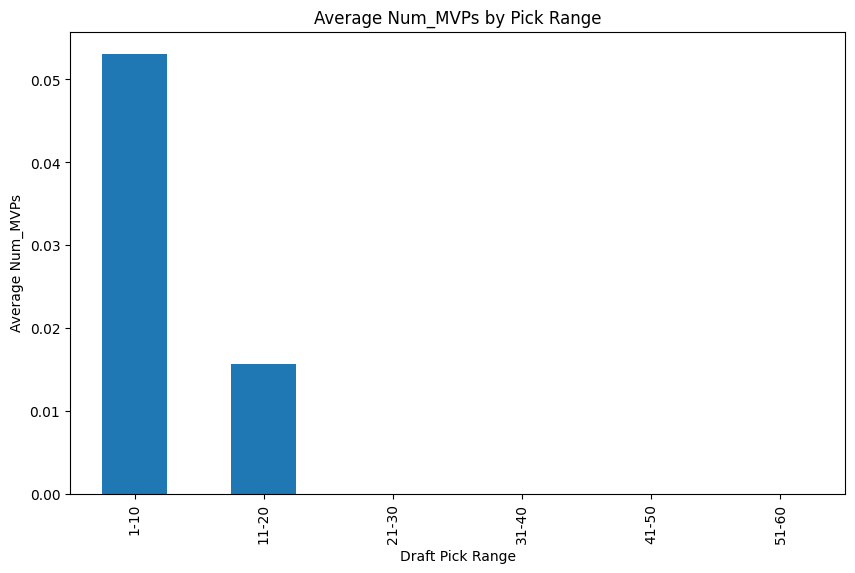

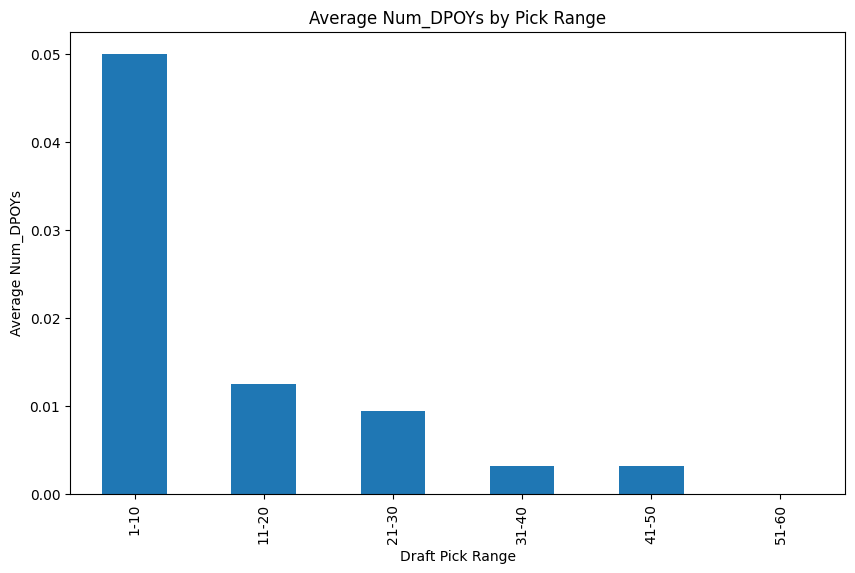

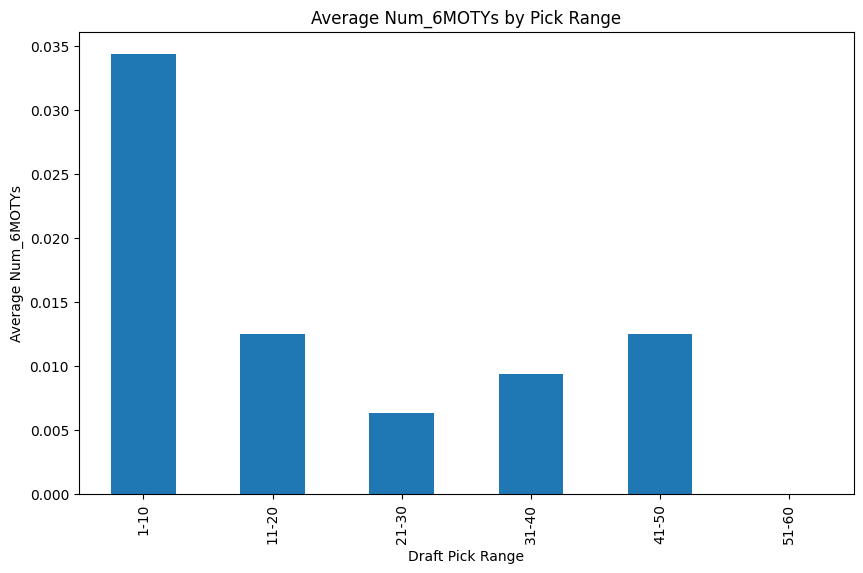

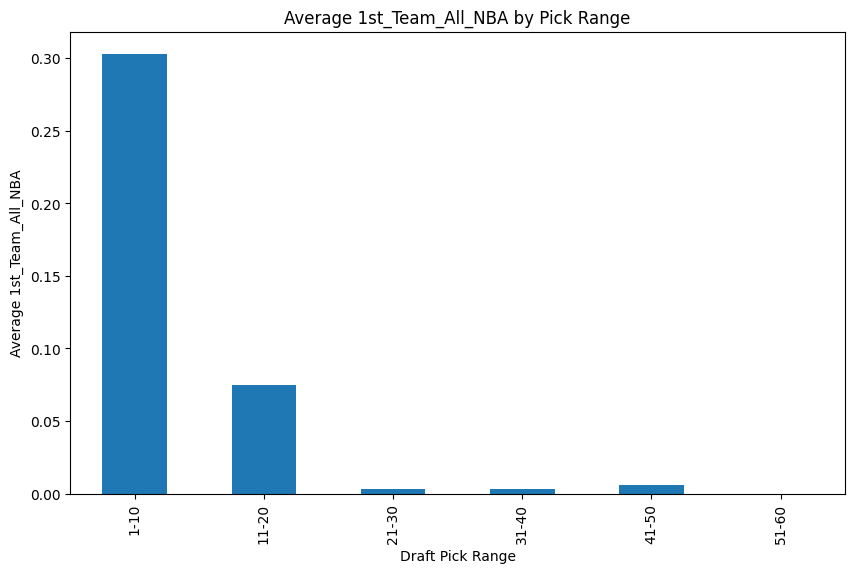

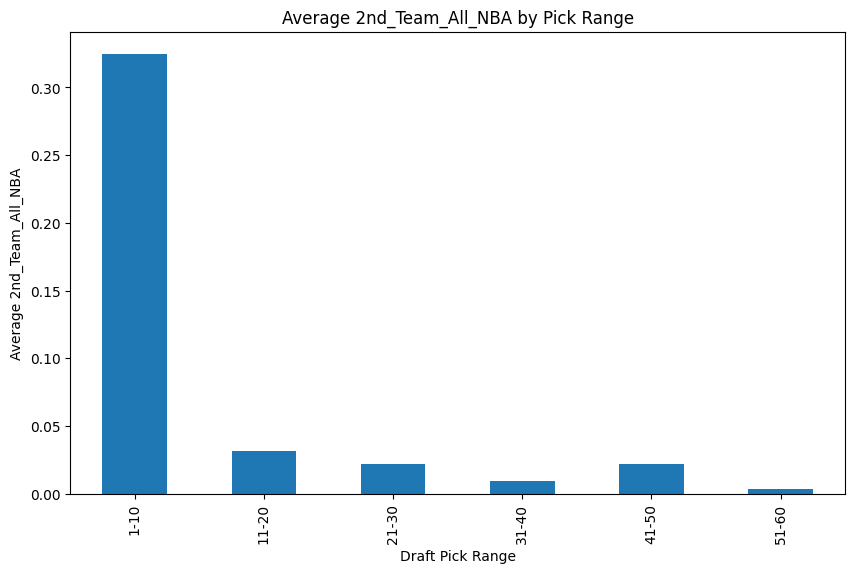

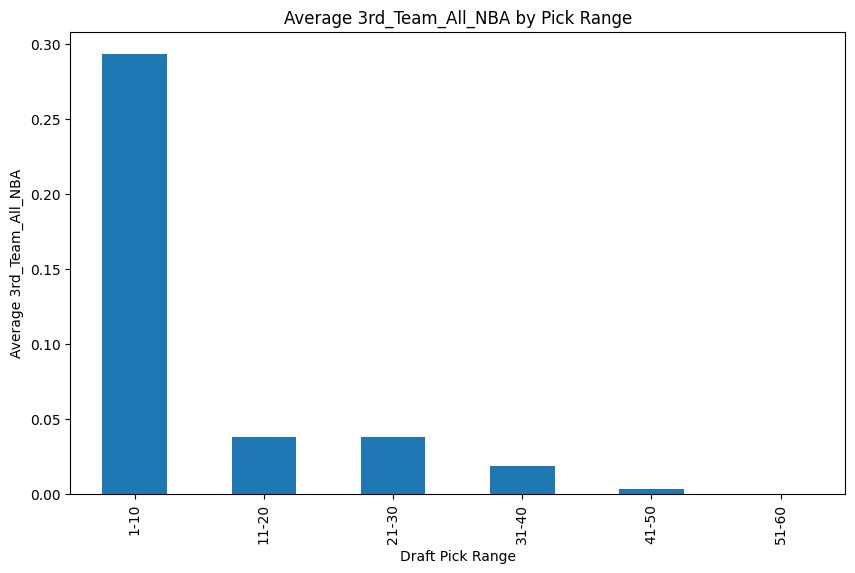

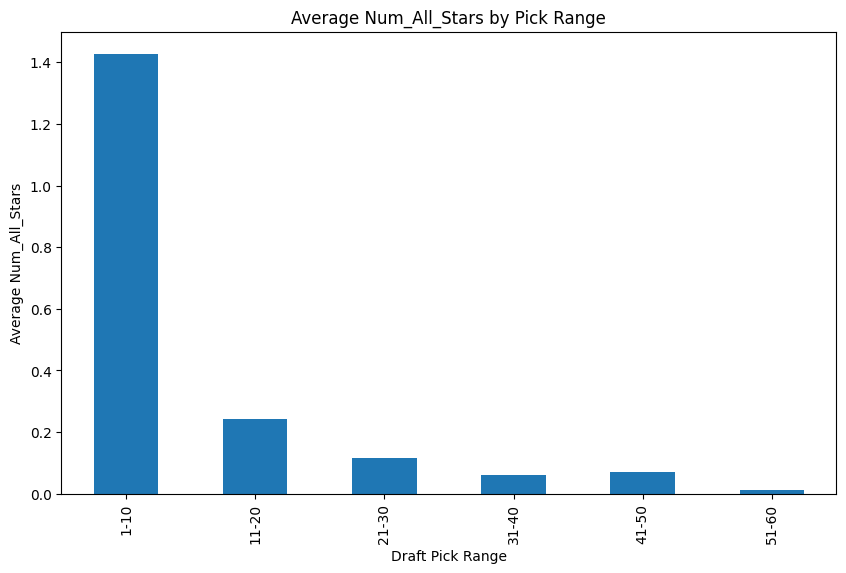

In [ ]:
#Bin the draft picks into pick ranges
final_df['Pick_Range'] = pd.cut(final_df['Pk'], bins=[0, 10, 20, 30, 40, 50, 60],
                          labels=['1-10', '11-20', '21-30', '31-40', '41-50', '51-60'])

#Function to create plot
def plot_metric_by_pick_range(metric, df):
    avg_by_range = df.groupby('Pick_Range')[metric].mean()

    plt.figure(figsize=(10, 6))
    avg_by_range.plot(kind='bar')
    plt.title(f'Average {metric} by Pick Range')
    plt.xlabel('Draft Pick Range')
    plt.ylabel(f'Average {metric}')
    plt.show()

# Now, call the function for each metric you're interested in:
metrics = ['Num_MVPs', 'Num_DPOYs', 'Num_6MOTYs', '1st_Team_All_NBA', '2nd_Team_All_NBA', '3rd_Team_All_NBA', 'Num_All_Stars']

for metric in metrics:
    plot_metric_by_pick_range(metric, final_df)


Visualizing Probability of Various Success Metrics Based on Draft Pick Number

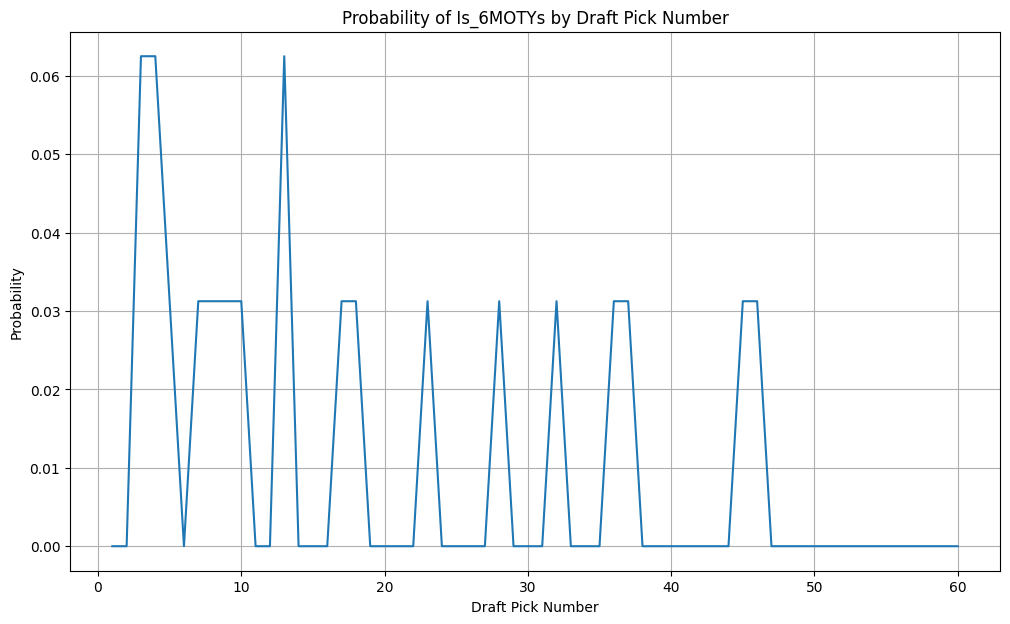

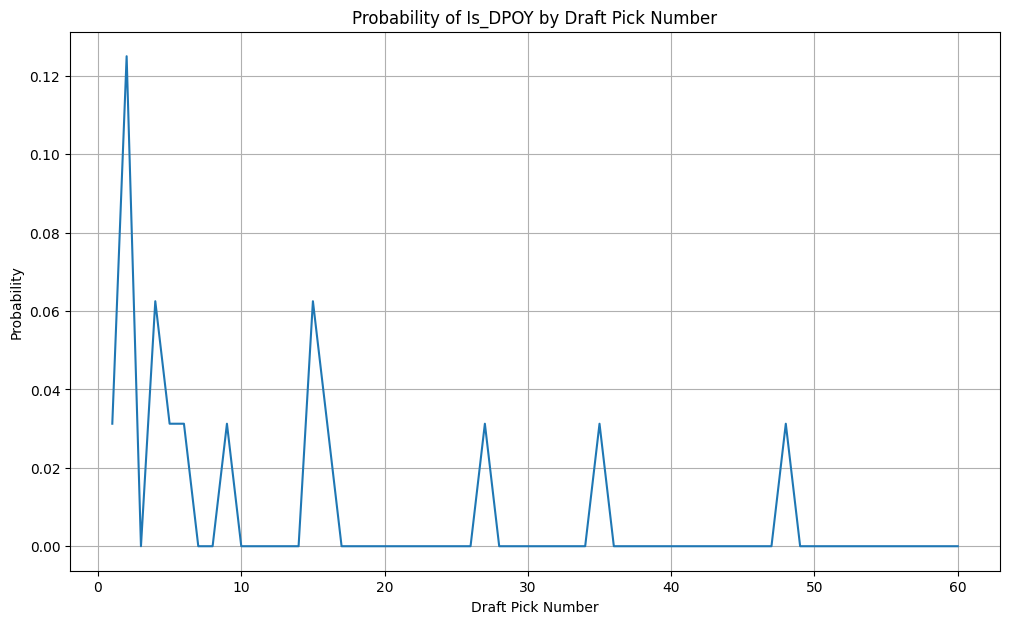

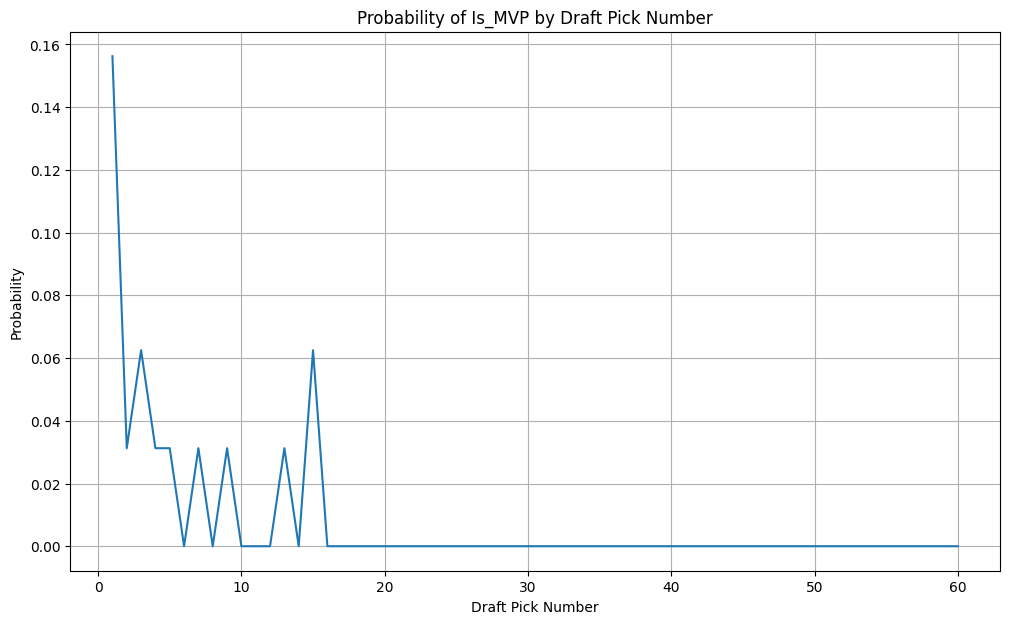

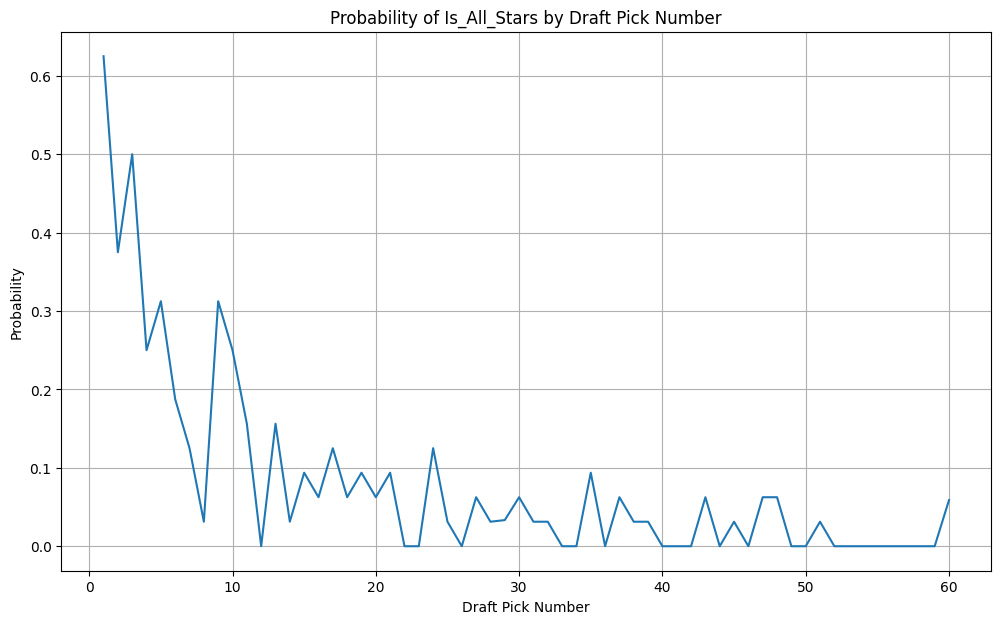

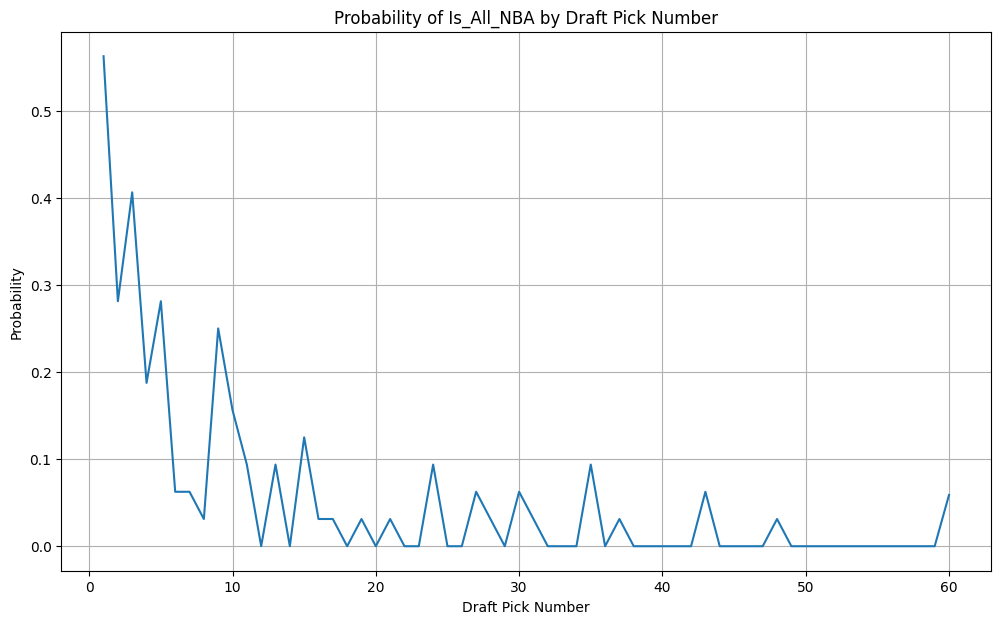

In [ ]:
#Adding columns to indicate if a player has at least one of a given success metric
final_df['Is_All_NBA'] = ((final_df['1st_Team_All_NBA'] > 0) |
                   (final_df['2nd_Team_All_NBA'] > 0) |
                   (final_df['3rd_Team_All_NBA'] > 0)).astype(int)

final_df['Is_All_Stars'] = (final_df['Num_All_Stars'] > 0).astype(int)
final_df['Is_MVP'] = (final_df['Num_MVPs'] > 0).astype(int)
final_df['Is_DPOY'] = (final_df['Num_DPOYs'] > 0).astype(int)
final_df['Is_6MOTYs'] = (final_df['Num_6MOTYs'] > 0).astype(int)



metrics = ['Is_6MOTYs', 'Is_DPOY', 'Is_MVP', 'Is_All_Stars', 'Is_All_NBA']


#Function to Create Plot
def plot_probability_by_pick_range(df, metric):
  probabilities = df.groupby('Pk')[metric].mean()

  plt.figure(figsize=(12, 7))
  probabilities.plot()
  plt.title(f'Probability of {metric} by Draft Pick Number')
  plt.xlabel('Draft Pick Number')
  plt.ylabel('Probability')
  plt.grid(True)
  plt.show()

for metric in metrics:
    plot_probability_by_pick_range(final_df, metric)



Visualizing Correlation Between Draft Pick Number and Success Metrics Using a Heatmap

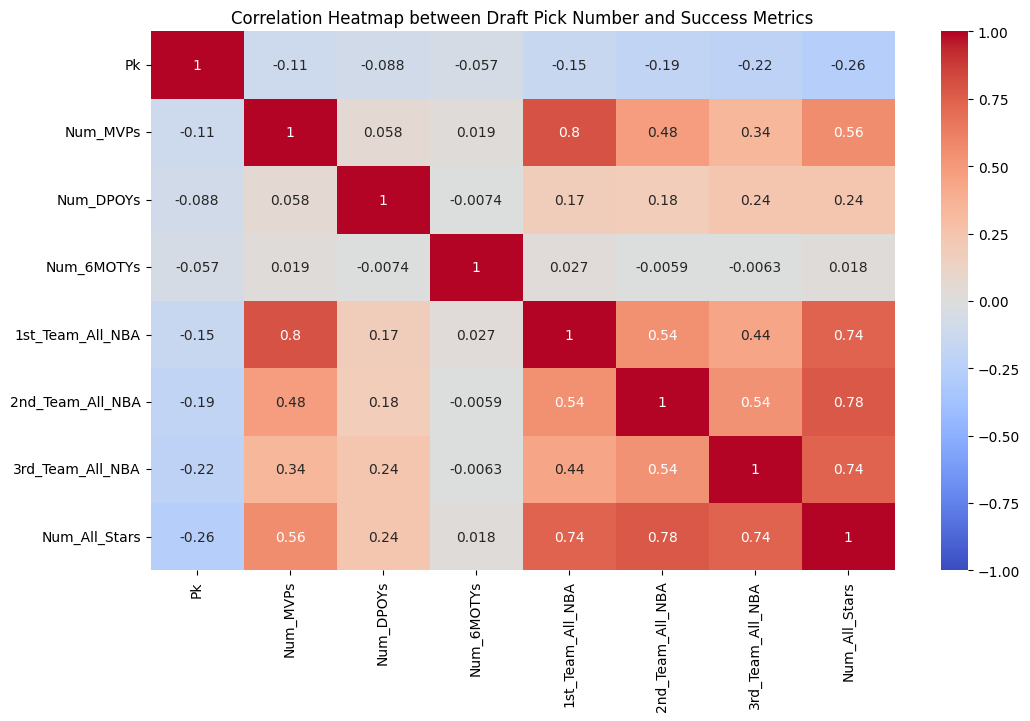

In [ ]:
#Selecting Relevant Columns for Heatmap and creating the correlation matrix
subset_df = final_df[['Pk', 'Num_MVPs', 'Num_DPOYs', 'Num_6MOTYs', '1st_Team_All_NBA', '2nd_Team_All_NBA', '3rd_Team_All_NBA', 'Num_All_Stars']]
correlation_matrix = subset_df.corr()

#Plotting the Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Draft Pick Number and Success Metrics')
plt.show()

Visualizing The Draft Pick Make up of NBA Teams Who Have Made the Playoffs

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode

In [ ]:
#Abbreviation of all NBA team names to be able to connect the data sets
nba_abbr = {'ATL':'Atlanta Hawks', 'BOS':'Boston Celtics', 'CHA':'Charlotte Hornets', 'CHI':'Chicago Bulls', 'CLE':'Cleveland Cavaliers', 'DAL':'Dallas Mavericks',
'DEN':'Denver Nuggets', 'DET':'Detroit Pistons', 'GSW':'Golden State Warriors', 'HOU':'Houston Rockets', 'IND':'Indiana Pacers', 'LAC':'Los Angeles Clippers',
'LAL':'Los Angeles Lakers', 'MEM':'Memphis Grizzlies', 'MIA':'Miami Heat', 'MIL':'Milwaukee Bucks', 'MIN':'Minnesota Timberwolves', 'NOH':'New Orleans Hornets',
'NYK':'New York Knicks', 'BKN':'Brooklyn Nets', 'BRK':'Brooklyn Nets', 'OKC':'Oklahoma City Thunder', 'ORL':'Orlando Magic', 'PHI':'Philadelphia 76ers', 'PHO':'Phoenix Suns',
'POR':'Portland Trail Blazers', 'SAC':'Sacramento Kings', 'SAS':'San Antonio Spurs', 'TOR':'Toronto Raptors', 'UTH':'Utah Jazz', 'WAS':'Washington Wizards', 'SEA':'Seattle SuperSonics',
'NOP':'New Orleans Pelicans', 'CHO':'Charlotte Hornets', 'NOK':'New Orleans Pelicans', 'NJN':'New Jersey Nets', 'CHH':'Charlotte Hornets', 'UTA':'Utah Jazz'}

In [ ]:
#NBA Playoff Data Cleaning
columns = ['team','wins','losses','win_percentage','plus_minus','season']
team_playoff = pd.read_csv('./nba_team_stats_playoffs_00_to_21.csv')[columns]

#Certain players were drafted before our draft data, so we will start at a later year than the playoff data has
team_playoff = team_playoff[team_playoff['season'] > '2005']

#Cleaning team and player names
team_playoff['season'] = team_playoff['season'].str[-2:]
team_playoff['team'] = team_playoff['team'].str.strip()
team_playoff['team'] = np.where(team_playoff['team'] == 'LA Clippers', 'Los Angeles Clippers', team_playoff['team'])
team_playoff = team_playoff.drop(team_playoff[team_playoff['team'] == 'Charlotte Bobcats'].index)
team_playoff.head()

,team,wins,losses,win_percentage,plus_minus,season
0,Milwaukee Bucks,16,7,0.696,5.1,21
1,Phoenix Suns,14,8,0.636,4.5,21
2,Brooklyn Nets,7,5,0.583,6.3,21
3,Philadelphia 76ers,7,5,0.583,7.5,21
4,Atlanta Hawks,10,8,0.556,-1.5,21


In [ ]:
#Player Season Info Cleaning
#This will be used to generate a new table that will have all the players on each playoff team with their draft position

player_data = pd.read_csv('./players.csv', encoding="latin-1", delimiter=";")[['Year','Player','Tm','MP','G']]
player_data = player_data[player_data['Year'] >= 2001]
player_data['Player'] = player_data['Player'].str.replace('*', '')
player_data['Player'] = player_data['Player'].str.replace('?', 'c')


player_data = player_data[(player_data.Tm != 'Tm') & (player_data.Tm != 'TOT')]
player_data['Year'] = player_data['Year'].apply(str).str[-2:]
player_data = player_data.replace({'Tm': nba_abbr})


#We're also going to be taking out players who did not contribute meaningfully (have to play more than 10 minutes per game, and more than 25 games)

player_data[["MP", "G"]] = player_data[["MP", "G"]].apply(pd.to_numeric)
player_data = player_data[(player_data['MP'] > 10) & (player_data['G'] > 25)]
player_data.head()

<ipython-input-8-d453c704833e>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  player_data['Player'] = player_data['Player'].str.replace('*', '')
<ipython-input-8-d453c704833e>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  player_data['Player'] = player_data['Player'].str.replace('?', 'c')


,Year,Player,Tm,MP,G
5143,01,Mahmoud Abdul-Rauf,VAN,11.9,41
5144,01,Tariq Abdul-Wahad,Denver Nuggets,14.5,29
5145,01,Shareef Abdur-Rahim,VAN,40.0,81
5148,01,Courtney Alexander,Dallas Mavericks,12.4,38
5149,01,Courtney Alexander,Washington Wizards,33.7,27


In [ ]:
#Combine the two new data sets with the draft data we have
team_draft_df = pd.merge(team_playoff, player_data,  how='left', left_on=['team','season'], right_on = ['Tm','Year']).drop(columns=['MP','G','Tm','Year'])

#We need to strip the draft data of punctuation so it can be properly matched
stripped_draft = draft_data.copy()
stripped_draft['Player'] = stripped_draft['Player'].replace('*', '',)
stripped_draft['Player'] = stripped_draft['Player'].str.strip()
stripped_draft['Player'] = stripped_draft['Player'].apply(lambda x: unidecode(x))
stripped_draft = stripped_draft.replace({'Tm':nba_abbr})
# stripped_draft.head()

team_draft_df = team_draft_df.merge(stripped_draft, how='left', on=['Player']).drop(columns=['Rk','Tm','DraftYear'])

#Players who went undrafted will be represented as pick position 61
team_draft_df['Pk'] = team_draft_df['Pk'].fillna(61)
# There still may be some players whose names did not match, making them draft position 61 instead of their real draft position.
#However, there are thousands of rows and only a few miss-assignments so this should't hurt the data too much
team_draft_df

,team,wins,losses,win_percentage,plus_minus,season,Player,Pk
0,Milwaukee Bucks,16,7,0.696,5.1,21,Giannis Antetokounmpo,15.0
1,Milwaukee Bucks,16,7,0.696,5.1,21,D.J. Augustin,9.0
2,Milwaukee Bucks,16,7,0.696,5.1,21,Pat Connaughton,41.0
3,Milwaukee Bucks,16,7,0.696,5.1,21,Donte DiVincenzo,17.0
4,Milwaukee Bucks,16,7,0.696,5.1,21,Bryn Forbes,61.0
...,...,...,...,...,...,...,...,...
2914,Memphis Grizzlies,0,4,0.000,-14.0,06,Mike Miller,5.0
2915,Memphis Grizzlies,0,4,0.000,-14.0,06,Damon Stoudamire,7.0
2916,Memphis Grizzlies,0,4,0.000,-14.0,06,Jake Tsakalidis,25.0
2917,Memphis Grizzlies,0,4,0.000,-14.0,06,Hakim Warrick,19.0


In [ ]:
#creating the averages for each playoff team for each year
mean_list = []
for year in team_draft_df.season.unique():
  df = team_draft_df[team_draft_df['season'] == year]
  for team in df.team.unique():
    curr_df = df[df['team'] == team]
    mean_list.append(curr_df['Pk'].mean())


#Adding in team pick averages in the original team_playoff dataframe
team_playoff['Pick_Mean'] = mean_list

#Adding a column for where each team exited in the playoffs
team_playoff['Exit'] = 'None'
team_playoff['Exit'] = np.where(team_playoff['wins'] == 16, 'Champions', team_playoff['Exit'])
team_playoff['Exit'] = np.where(team_playoff['wins'] < 16, 'Finals', team_playoff['Exit'])
team_playoff['Exit'] = np.where(team_playoff['wins'] < 12, 'Conference Finals', team_playoff['Exit'])
team_playoff['Exit'] = np.where(team_playoff['wins'] < 8, 'Second Round', team_playoff['Exit'])
team_playoff['Exit'] = np.where(team_playoff['wins'] < 4, 'First Round', team_playoff['Exit'])
team_playoff.head()

,team,wins,losses,win_percentage,plus_minus,season,Pick_Mean,Exit
0,Milwaukee Bucks,16,7,0.696,5.1,21,25.666667,Champions
1,Phoenix Suns,14,8,0.636,4.5,21,28.153846,Finals
2,Brooklyn Nets,7,5,0.583,6.3,21,25.083333,Second Round
3,Philadelphia 76ers,7,5,0.583,7.5,21,26.818182,Second Round
4,Atlanta Hawks,10,8,0.556,-1.5,21,20.166667,Conference Finals


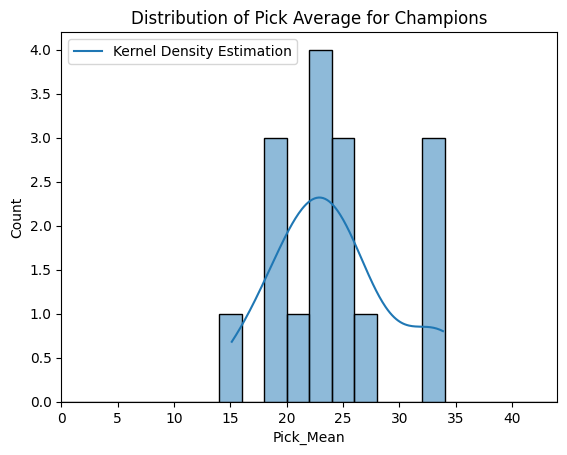

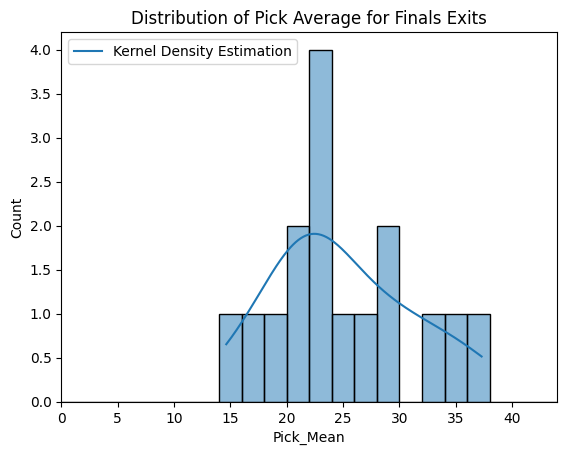

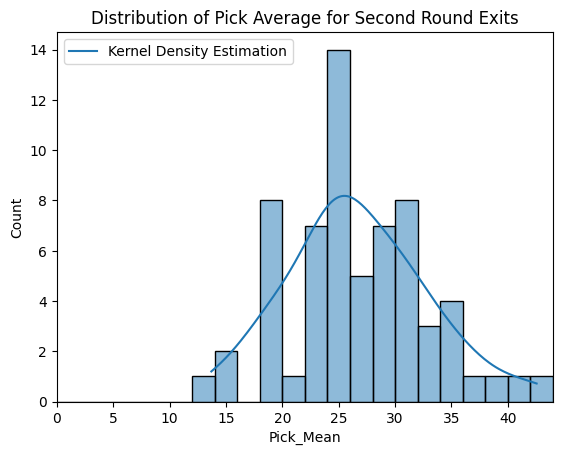

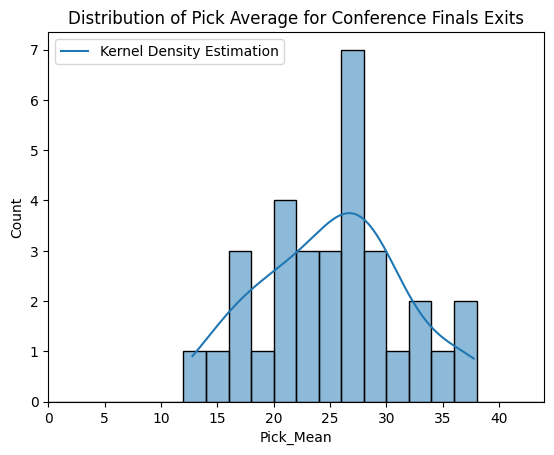

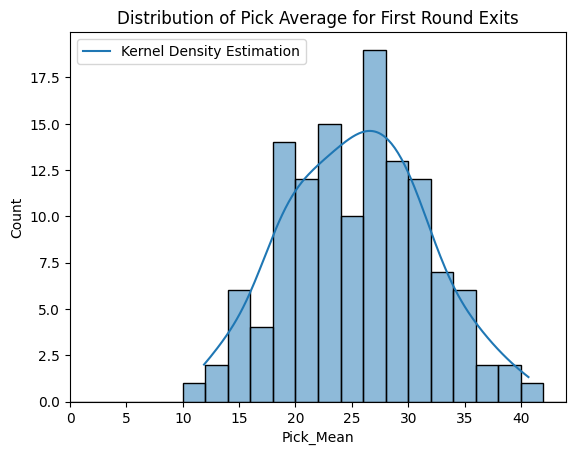

In [ ]:
#Creating histograms with density distribution to show how each round of team is composed

a_min = np.min(team_playoff['Pick_Mean'])
a_max = np.max(team_playoff['Pick_Mean'])
base = 2
for exit in pd.unique(team_playoff['Exit']):
  plt.figure()
  plt.title('Distribution of Pick Average for ' + exit)
  if exit != 'Champions':
    plt.title('Distribution of Pick Average for ' + exit + ' Exits')
  sns.histplot(data=team_playoff[team_playoff['Exit']==exit], x='Pick_Mean', kde=True, bins=int((a_max//base+1)*base/base), binrange=(0,(a_max//base+1)*base), legend=True)
  plt.legend(['Kernel Density Estimation'])
  plt.xlim(0,(a_max//base+1)*base)

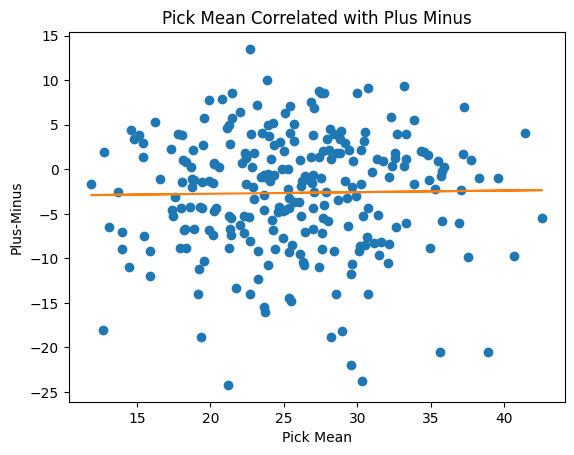

In [ ]:
#Creating scatter plot to correlate pick mean and team plus-minus

x = team_playoff['Pick_Mean']
y = team_playoff['plus_minus']
plt.plot(x, y, 'o')
plt.title('Pick Mean Correlated with Plus Minus')
plt.xlabel('Pick Mean')
plt.ylabel('Plus-Minus')
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

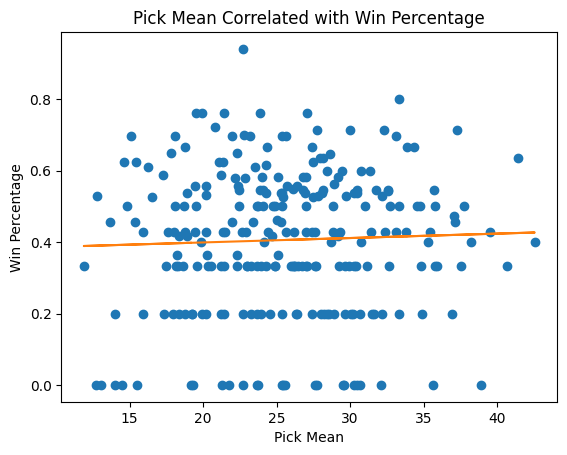

In [ ]:
#Creating scatterplot to correlate pick mean with win percentage

x = team_playoff['Pick_Mean']
y = team_playoff['win_percentage']
plt.plot(x, y, 'o')
plt.title('Pick Mean Correlated with Win Percentage')
plt.xlabel('Pick Mean')
plt.ylabel('Win Percentage')
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)